2024-01-02 15:46:11.419469: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 15:46:11.453423: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-02 15:46:11.453465: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-02 15:46:11.453484: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-02 15:46:11.458826: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-01-02 15:46:11.459566: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

,Tanggal,qty,Jumlah
Tanggal,,,
2016-01-01,2016-01-01,8694,63467076.0
2016-01-02,2016-01-02,10044,73320032.0
2016-01-03,2016-01-03,13928,101671188.0
2016-01-04,2016-01-04,12518,91382972.0
2016-01-05,2016-01-05,11112,77424375.0
...,...,...,...
2021-10-25,2021-10-25,12239,93628350.0
2021-10-26,2021-10-26,11319,86590350.0
2021-10-27,2021-10-27,12502,95640300.0


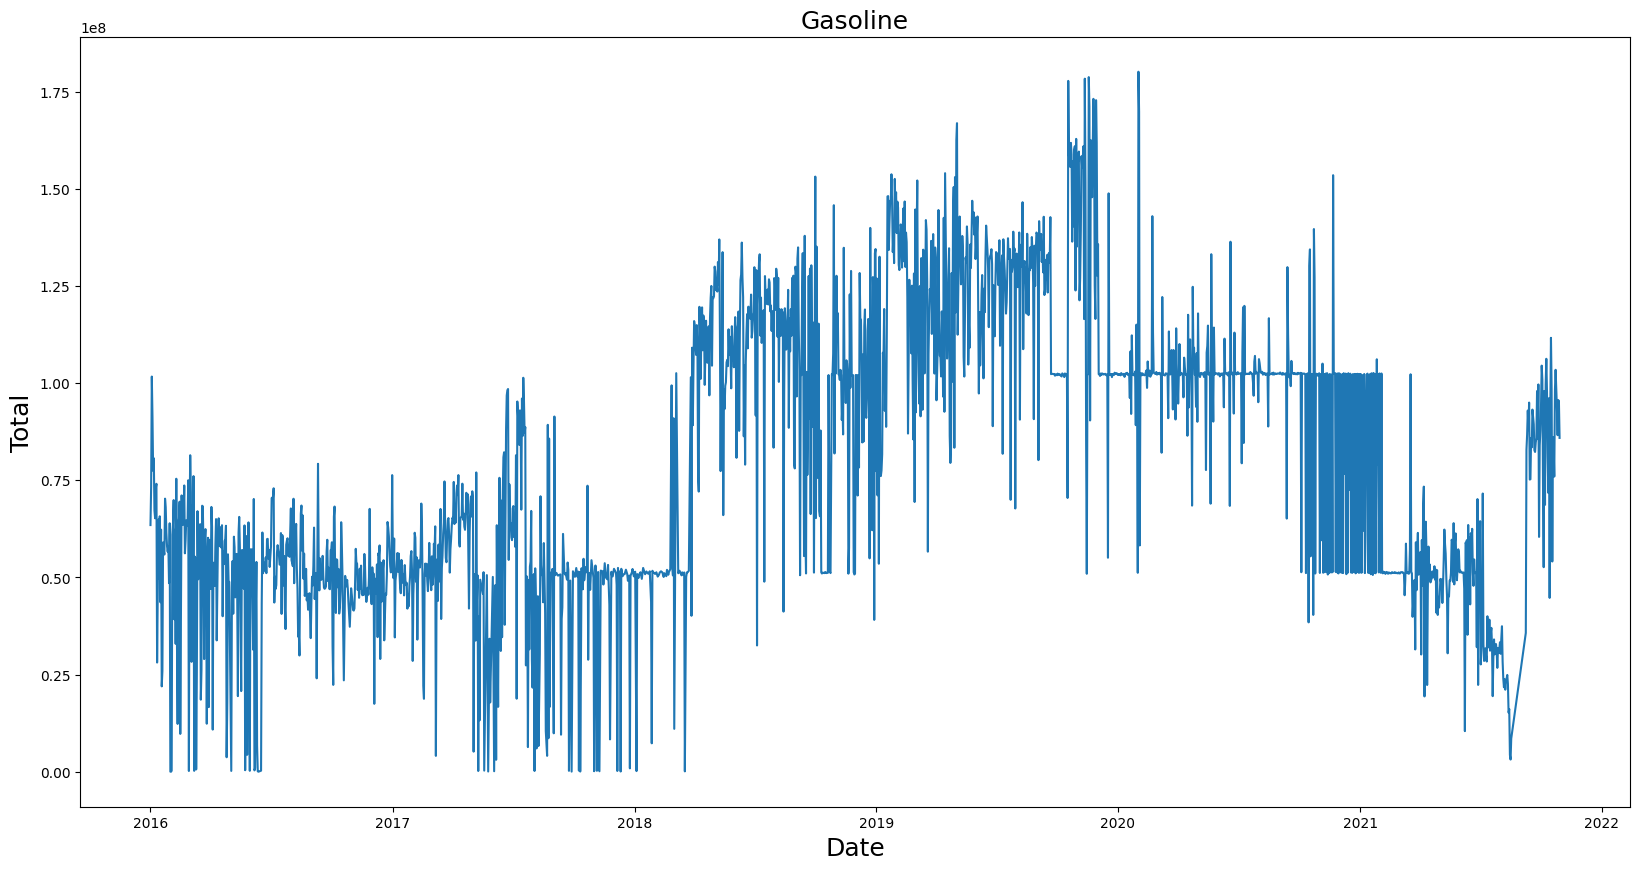

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import time
mulai = time.time()

# Load dataset
df = pd.read_csv('Gasoline.csv')

# Set Tanggal as datetime index
df['Tanggal'] = pd.to_datetime(df.Tanggal, format='%Y-%m-%d')
df.index = df['Tanggal']

# Plot dataset
plt.figure(figsize=(20, 10))
plt.plot(df['Jumlah'], label='History Harga Penutup')
plt.title('Gasoline', fontsize=18)
plt.ylabel('Total', fontsize=18)
plt.xlabel('Date', fontsize=18)

df

In [2]:
# Min-max scaling
scaler = MinMaxScaler(feature_range=(0, 1))
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0, len(df)), columns=['Tanggal', 'Jumlah'])
for i in range(0, len(df)):
    new_data['Tanggal'][i] = data['Tanggal'][i]
    new_data['Jumlah'][i] = data['Jumlah'][i]

new_data.index = new_data['Tanggal']
new_data.drop('Tanggal', axis=1, inplace=True)

dataset = new_data.values

# Train-test split
train, valid = train_test_split(dataset, test_size=0.2, shuffle=False, random_state=0)

scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

# Prepare data for training
x_train, y_train = [], []
for i in range(60, len(train)):
    x_train.append(scaled_data[i - 60:i, 0])
    y_train.append(scaled_data[i, 0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

x_train

/tmp/ipykernel_22062/1457822047.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Tanggal'][i] = data['Tanggal'][i]
/tmp/ipykernel_22062/1457822047.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  new_data['Jumlah'][i] = data['Jumlah'][i]


array([[[0.35237041],
        [0.40708254],
        [0.56451266],
        ...,
        [0.41636229],
        [0.00106129],
        [0.36089651]],

       [[0.40708254],
        [0.56451266],
        [0.5073836 ],
        ...,
        [0.00106129],
        [0.36089651],
        [0.45212047]],

       [[0.56451266],
        [0.5073836 ],
        [0.4298734 ],
        ...,
        [0.36089651],
        [0.45212047],
        [0.39878692]],

       ...,

       [[0.56888311],
        [0.56927709],
        [0.56838169],
        ...,
        [0.56881148],
        [0.56909801],
        [0.56881148]],

       [[0.56927709],
        [0.56838169],
        [0.44062611],
        ...,
        [0.56909801],
        [0.56881148],
        [0.56838169]],

       [[0.56838169],
        [0.44062611],
        [0.59950577],
        ...,
        [0.56881148],
        [0.56838169],
        [0.57035157]]])

In [3]:
# Membuat Model dan fit LSTM Network
model = Sequential()
model.add(LSTM(units=60, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(units=60))
model.add(Dropout(0.4))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=100, batch_size=4, verbose=1, validation_data=(x_train, y_train))

Epoch 1/100
385/385 [==============================] - 15s 35ms/step - loss: 0.0197 - val_loss: 0.0114
Epoch 2/100
385/385 [==============================] - 14s 35ms/step - loss: 0.0161 - val_loss: 0.0118
Epoch 3/100
385/385 [==============================] - 13s 35ms/step - loss: 0.0148 - val_loss: 0.0112
Epoch 4/100
385/385 [==============================] - 16s 41ms/step - loss: 0.0137 - val_loss: 0.0161
Epoch 5/100
385/385 [==============================] - 16s 43ms/step - loss: 0.0141 - val_loss: 0.0146
Epoch 6/100
385/385 [==============================] - 16s 42ms/step - loss: 0.0131 - val_loss: 0.0105
Epoch 7/100
385/385 [==============================] - 16s 42ms/step - loss: 0.0131 - val_loss: 0.0114
Epoch 8/100
385/385 [==============================] - 16s 42ms/step - loss: 0.0128 - val_loss: 0.0114
Epoch 9/100
385/385 [==============================] - 16s 42ms/step - loss: 0.0127 - val_loss: 0.0110
Epoch 10/100
385/385 [==============================] - 16s 42ms/step - l

Epoch 80/100
385/385 [==============================] - 14s 37ms/step - loss: 0.0108 - val_loss: 0.0106
Epoch 81/100
385/385 [==============================] - 14s 37ms/step - loss: 0.0106 - val_loss: 0.0105
Epoch 82/100
385/385 [==============================] - 12s 30ms/step - loss: 0.0107 - val_loss: 0.0098
Epoch 83/100
385/385 [==============================] - 12s 31ms/step - loss: 0.0106 - val_loss: 0.0097
Epoch 84/100
385/385 [==============================] - 14s 35ms/step - loss: 0.0105 - val_loss: 0.0097
Epoch 85/100
385/385 [==============================] - 13s 33ms/step - loss: 0.0104 - val_loss: 0.0100
Epoch 86/100
385/385 [==============================] - 13s 34ms/step - loss: 0.0104 - val_loss: 0.0099
Epoch 87/100
385/385 [==============================] - 13s 35ms/step - loss: 0.0104 - val_loss: 0.0097
Epoch 88/100
385/385 [==============================] - 14s 36ms/step - loss: 0.0102 - val_loss: 0.0100
Epoch 89/100
385/385 [==============================] - 15s 39ms

In [4]:
# Prediksi 246 Values dengan 60 Data Train
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = scaler.transform(inputs)
x_test = []

for i in range(60, inputs.shape[0]):
    x_test.append(inputs[i - 60:i, 0])
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

closing_price = model.predict(x_test)
closing_price = scaler.inverse_transform(closing_price)

akhir = time.time()
waktu_detik = akhir - mulai
waktu_menit = "{:.2f}".format(waktu_detik / 60)

13/13 [==============================] - 1s 13ms/step


In [5]:
rmse = np.sqrt(np.mean((valid - closing_price) ** 2))
mape = np.mean(np.abs((valid - closing_price) / closing_price)) * 100

RMSE: 18129570.86
MAPE: 19.57 %
Program run in = 23.91 min


/tmp/ipykernel_22062/3001081126.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Tanggal'] = df['Tanggal'][len(train):].values
/tmp/ipykernel_22062/3001081126.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = closing_price


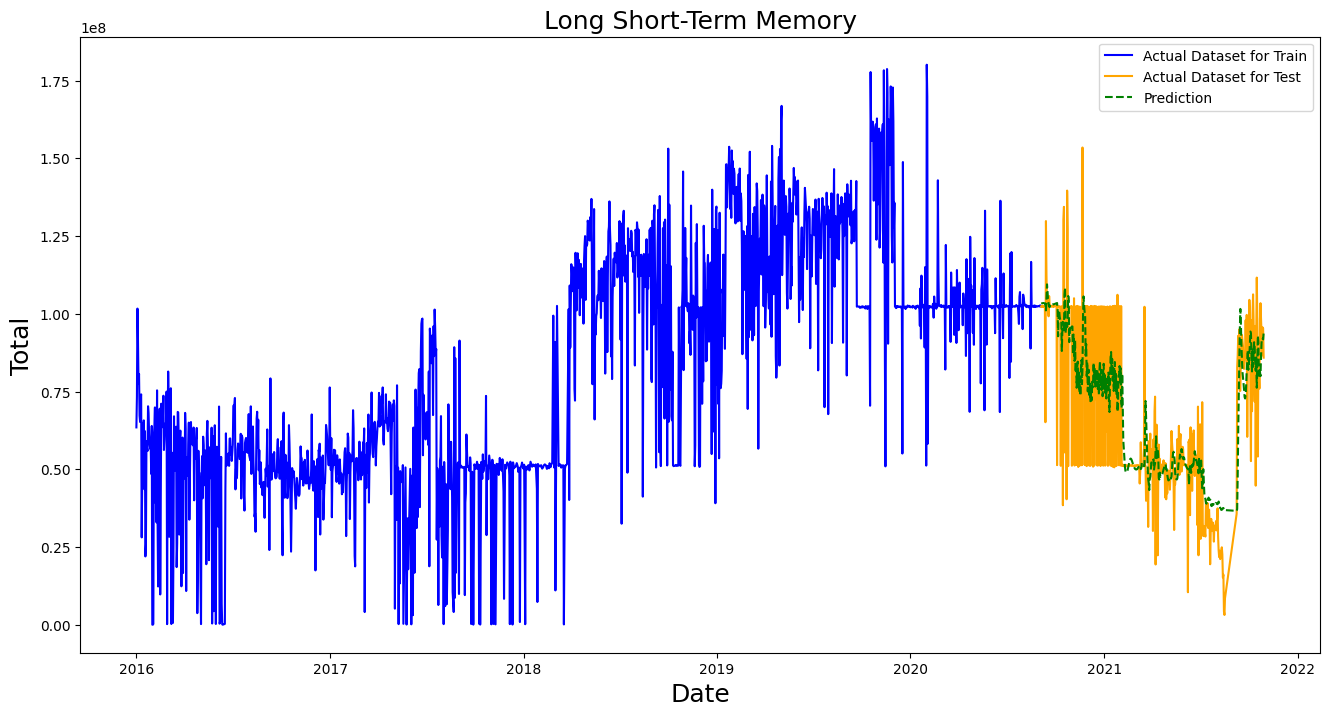

In [6]:
# Chart Grafik
train = new_data[:len(train)]
valid = new_data[len(train):]

# Tambahkan Tanggal pada Data Uji (valid)
valid['Tanggal'] = df['Tanggal'][len(train):].values

# Tambahkan Prediksi pada Data Uji (valid)
valid['Predictions'] = closing_price

print("RMSE:", "{:.2f}".format(rmse))
print("MAPE:", "{:.2f}".format(mape), "%")
print(f"Program run in = {waktu_menit} min")

# Plot Grafik
plt.figure(figsize=(16, 8))
plt.title('Long Short-Term Memory', fontsize=18)
plt.plot(train['Jumlah'], label='Actual Dataset for Train', color='blue')
plt.plot(valid['Jumlah'], label='Actual Dataset for Test', color='orange')
plt.plot(valid['Predictions'], label='Prediction', linestyle='--', color='green')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total', fontsize=18)
plt.legend()
plt.show()

Text(0, 0.5, 'Total')

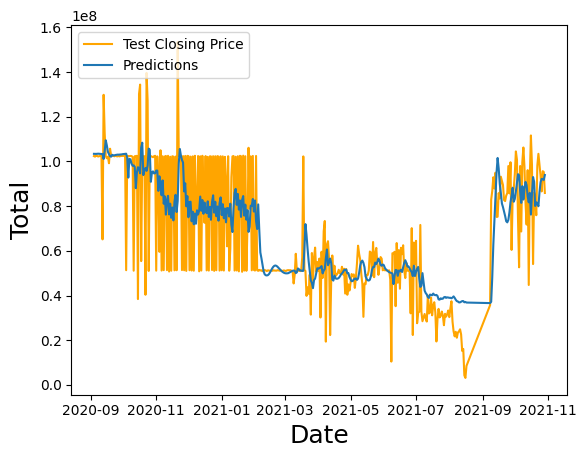

In [7]:
plt.plot(valid['Jumlah'], label = 'Test Closing Price',color='orange')
plt.plot(valid['Predictions'], label = 'Predictions')
plt.legend(loc="upper left")
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total', fontsize=18)